In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter
from matplotlib.patches import Rectangle

## Data Upload

In [143]:
mer_init = pd.read_csv('mer.csv', encoding='cp1251', sep=';')
mer_init.rename(columns = 
                {'имя скважины':'well',
                 'дата(дд.мм.гггг)':'date',
                 'пласт':'zone',
                 'характер работы':'type',
                 'состояние':'status',
                 'способ эксплуатации':'pump',
                 'время работы':'work_time',
                 'время простоя':'standby_time',
                 'нефть':'oil_t',
                 'вода':'water_t',
                 'закачка':'injection'}, inplace=True)
mer = mer_init[['well', 'date', 'zone', 'type', 'status', 'pump', 'work_time', 'standby_time', 'oil_t', 'water_t', 'injection']]
mer['oil_tday'] = (mer_init.oil_t/mer_init.work_time)*24
mer['water_tday'] = (mer_init.water_tday/mer_init.work_time)*24
mer['watercut'] = (mer_init.oil_t/mer_init.work_time)*24
mer.head()

<ipython-input-143-d12435ba683d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mer['oil_t/day'] = (mer_init.oil_t/mer_init.work_time)*24


,well,date,zone,type,status,pump,work_time,standby_time,oil_t,water_t,injection,oil_t/day
0,1,01.11.2007,БС9/2,НЕФ,РАБ.,ЭЦН,528,0,1034.0,1713.0,0.0,47.000000
1,1,01.12.2007,БС9/2,НЕФ,РАБ.,ЭЦН,303,441,382.0,852.0,0.0,30.257426
2,1,01.01.2008,БС9/2,НЕФ,РАБ.,ЭЦН,744,0,626.0,1725.0,0.0,20.193548
3,1,01.02.2008,БС9/2,НЕФ,РАБ.,ЭЦН,422,274,233.0,1061.0,0.0,13.251185
4,1,01.03.2008,БС9/2,НЕФ,РАБ.,ЭЦН,744,0,649.0,1890.0,0.0,20.935484


In [135]:
def mer_month_quant(mer, period = 6):
    oil_cumul = pd.DataFrame(mer.groupby(['well'])['oil_t'].apply(lambda x: np.nansum(np.array(x[:period]))))
    work_time_cumul =  pd.DataFrame(mer.groupby(['well'])['work_time'].apply(lambda x: np.nansum(np.array(x[:period]))))
    oil_cumul.rename(columns={'oil_t':'cum_oil_t'}, inplace=True)
    work_time_cumul.rename(columns={'work_time':'work_time_hr'}, inplace=True)
    result = oil_cumul.join(work_time_cumul)
    return result

In [136]:
mer_final = mer_month_quant(mer, 6)
mer_final['oil_t/day'] = (mer_final.cum_oil_t/mer_final.work_time_hr)*24
mer_final

,cum_oil_t,work_time_hr,oil_t/day
well,,,
1,3572.0,3461,24.769720
1006,1137.0,3984,6.849398
1007,0.0,3696,0.000000
1010,0.0,1608,0.000000
1031,14248.0,3888,87.950617
...,...,...,...
472P,0.0,0,NaN
475P,0.0,0,NaN
476P,0.0,0,NaN


In [127]:
frac_init = pd.read_csv('welltest_091120221832.csv', encoding='cp1251', sep=';')
frac_init.rename(columns={'NSKV_SRC':'well',
                          'DATE_OP':'date_op',
                          'LAYER':'zone',
                          'NUM_OPER':'num_oper',
                          'PERFORMER':'perform',
                          'TOP':'depth',
                          'MPR_PLAN':'weight_surf',
                          'MPR_LAYER':'weight_layer',
                          'COMMENTS':'comments'}, inplace=True)
frac['comments'] = frac['comments'].astype("string")
frac['perform'] = frac['perform'].astype("string")
frac['well'] = frac['well'].astype("string")
frac['date_op'] = pd.to_datetime(frac['date_op'])
frac['num_oper'] = frac['num_oper'].astype("string")
frac['depth'] = frac['depth'].astype("float64")
frac = frac_init[['well', 'date_op', 'num_oper', 'perform', 'depth', 'weight_surf', 'weight_layer', 'comments']]

In [129]:
# frac.query('num_oper == "7 из 7"')
frac.query('well == "2619"')

,well,date_op,num_oper,perform,depth,weight_surf,weight_layer,comments
709,2619,17.06.17 00:00:00,1 из 7,Halliburton,4150.34,80.0,79.8,При проведения ГРП на данной скважине использо...
710,2619,17.06.17 02:00:00,2 из 7,Halliburton,3991.80,81.0,79.8,При проведения ГРП на данной скважине использо...
711,2619,19.06.17 00:00:00,3 из 7,Halliburton,3872.20,NaN,0.0,При проведения ГРП на данной скважине использо...
712,2619,24.06.17 00:00:00,3 из 7,Halliburton,3872.20,82.0,81.8,При проведении ГРП на данной скважине использо...
713,2619,24.06.17 02:00:00,4 из 7,Halliburton,3758.80,80.0,79.8,При проведения ГРП на данной скважине использо...
714,2619,25.06.17 00:00:00,5 из 7,Halliburton,3649.30,81.0,80.8,При проведения ГРП на данной скважине использо...
715,2619,26.06.17 00:00:00,6 из 7,Halliburton,3540.50,81.0,80.8,При проведения ГРП на данной скважине использо...
716,2619,27.06.17 00:00:00,7 из 7,Halliburton,3420.90,80.0,79.8,При проведения ГРП на данной скважине использо...


In [139]:
mer_final.query('well == "2619"')

,cum_oil_t,work_time_hr,oil_t/day
well,,,
2619,13198.94,4221,75.047278


In [132]:
# frac_count = pd.DataFrame(frac.groupby(['well'])['num_oper'].count())
# frac_weight = pd.DataFrame(frac.groupby(['well'])['weight_layer'].mean())

,weight_layer
well,
1,70.507000
102Р,29.500000
1130,57.700000
1132,60.400000
1134,30.350000
...,...
430Р,73.400000
460Р,88.136000
476P,59.500000


In [94]:
frac.comments.replace(np.nan, 'none', regex=True)
for num, txt in enumerate(frac['comments']):
    if 'СТОП' in txt or 'стоп' in txt:
        print(frac_comments['well'][num])
        print(txt)

1151
7 из 7,СТОП  Р=700 а.т.м.,По согласованию с заказчиком принято решение: уменьшить объём буферной стадии с 17 м3. до 15 м3. снизить скорость закачки с 3.6 м3/мин. до 3.4 м3/мин.Исходя из результатов лабораторного тестирования был изменен график подачи капс
1714
4 из 7,СТОП. Рост давления до 566атм-633атм, ,Проведено замещение в объеме 20 м?. 2.  После анализа данных, полученных при проведении  стадии замещение, было получено эффективное давление 65атм. (план 24атм.), эффективность жидкости 85% (план 64%).  Было 
1714
7 из 7,СТОП.рост давления,При концетрации в пласт 620 кг/м3 произошел резкий рост давления, получен режим "СТОП".  С поверхности закачано 17.5 тн, в пласт 7.7 тн, в НКТ 9.8тн. 5. Пробы геля, воды, хим. реагентов отобраны в присутствие супервайзера ООО "Бу
2422Г
Получен "стоп" при забойной концентрации проппанта 890 кг/м3. Наиболее вероятная причина преждевременной остановки - созданиенескольких трещин в процессе проведения ГРП. В следствие этого происходили дополнитель

In [12]:
frac_count.head()

,num_oper
well,
1,2
102Р,1
1130,1
1132,1
1134,1


In [13]:
frac_weight.head()

,weight_layer
well,
1,70.507
102Р,29.500
1130,57.700
1132,60.400
1134,30.350


In [103]:
def func_lst(*args):
    lst = []
    for x in args:
        lst.append(x)
    return lst
frac_date_op = pd.DataFrame(frac.groupby(['well'])['date_op'].apply(lambda x: func_lst(x)))

In [105]:
frac_date_op.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 1 to 9314
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date_op  432 non-null    object
dtypes: object(1)
memory usage: 6.8+ KB


In [8]:
def lenght_lst(x):
    return len(x)
frac_date_op['q_fracs'] = pd.DataFrame(frac.groupby(['well'])['date_op'].apply(lambda x: lenght_lst(x)))

In [14]:
frac_date_op['weights'] = pd.DataFrame(frac.groupby(['well'])['weight_layer'].apply(lambda x: func_lst(x)))

In [17]:
frac_date_op['perform'] = pd.DataFrame(frac.groupby(['well'])['perform'].apply(lambda x: func_lst(x)))
frac_final = frac_date_op[['date_op', 'perform', 'weights', 'q_fracs']]

In [18]:
frac_final

,date_op,perform,weights,q_fracs
well,,,,
1,"[[16.10.07 00:00:00, 28.10.07 00:00:00]]","[[Slb, Slb]]","[[nan, 70.507]]",2
102Р,[[16.11.11 00:00:00]],[[Trican]],[[29.5]],1
1130,[[17.12.10 00:00:00]],[[Наll]],[[57.7]],1
1132,[[16.07.10 00:00:00]],[[Наll]],[[60.4]],1
1134,[[30.08.10 00:00:00]],[[Наll]],[[30.35]],1
...,...,...,...,...
430Р,[[26.05.07 00:00:00]],[[Наll]],[[73.4]],1
460Р,[[27.04.07 00:00:00]],[[Slb]],[[88.13600000000001]],1
476P,[[11.10.12 00:00:00]],[[MeKaMi]],[[59.5]],1


In [62]:
mer_frac_final = mer_final.join(frac_final)
mer_frac_final

,cum_oil_t,work_time_hr,oil_t/day,date_op,perform,weights,q_fracs
well,,,,,,,
1,3572.0,3461,24.769720,"[[16.10.07 00:00:00, 28.10.07 00:00:00]]","[[Slb, Slb]]","[[nan, 70.507]]",2.0
1006,1137.0,3984,6.849398,NaN,NaN,NaN,NaN
1007,0.0,3696,0.000000,NaN,NaN,NaN,NaN
1010,0.0,1608,0.000000,NaN,NaN,NaN,NaN
1031,14248.0,3888,87.950617,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
472P,0.0,0,NaN,NaN,NaN,NaN,NaN
475P,0.0,0,NaN,NaN,NaN,NaN,NaN
476P,0.0,0,NaN,[[11.10.12 00:00:00]],[[MeKaMi]],[[59.5]],1.0


In [136]:
mer_frac_clean = mer_frac_final.copy()
mer_frac_clean_byfrac = mer_frac_clean[mer_frac_clean['q_fracs'].notnull()]
mer_frac_clean_byoil = mer_frac_clean[mer_frac_clean['oil_t/day'].notnull()]

In [84]:
len(mer_frac_clean_byfrac), len(mer_frac_clean_byoil)

(404, 959)

In [122]:
def convert(list):
    return tuple(i for i in list)
def mode_lst(lst):
    result = max(set(lst), key=lst.count)
    return result

In [137]:
mer_frac_clean_byfrac.loc[:, 'perform'] = mer_frac_clean_byfrac['perform'].apply(lambda x: mode_lst(convert(x[0])))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [148]:
mer_frac_clean_byfrac.perform.unique()

array(['Slb', 'Наll', 'CWS', 'PetAls', 'МеКаМинефть', 'MeKaMi', 'SLB',
       nan, 'Trican', 'MeKaMi-7', 'MeKaMi-6', 'MeKaMi-13', 'Катконефть',
       'BJ', 'Halliburton', 'Пакер-сервис', 'КЕЖУЙ'], dtype=object)

In [189]:
mer_frac_clean_byfrac

,cum_oil_t,work_time_hr,oil_t/day,date_op,perform,weights,q_fracs
well,,,,,,,
1,3572.00,3461,24.769720,"[[16.10.07 00:00:00, 28.10.07 00:00:00]]",Slb,"[[nan, 70.507]]",2.0
1130,2262.00,2616,20.752294,[[17.12.10 00:00:00]],Наll,[[57.7]],1.0
1132,6258.00,3696,40.636364,[[16.07.10 00:00:00]],Наll,[[60.4]],1.0
1134,2790.00,3984,16.807229,[[30.08.10 00:00:00]],Наll,[[30.35]],1.0
1135,8928.00,3408,62.873239,[[15.11.06 00:00:00]],Slb,[[90.48299999999999]],1.0
...,...,...,...,...,...,...,...
3185,5157.00,2520,49.114286,[[05.01.08 00:00:00]],Slb,[[108.64]],1.0
3217,11088.76,2952,90.152520,"[[19.03.14 00:00:00, 20.03.14 00:00:00, 20.03....",MeKaMi-6,"[[49.8, 49.8, 49.8, 49.8, 49.8, 0.0]]",6.0
3218,0.00,2304,0.000000,[[21.04.14 00:00:00]],MeKaMi-6,[[23.0]],1.0


In [169]:
def max_time(lst):
    return max(lst)

In [190]:
mer_frac_clean_byfrac.loc[:,'date_op_max'] =mer_frac_clean_byfrac['date_op'].apply(lambda x: max_time(x[0]))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [195]:
mer_frac_clean_byfrac

,cum_oil_t,work_time_hr,oil_t/day,date_op,perform,weights,q_fracs,date_op_max
well,,,,,,,,
1,3572.00,3461,24.769720,"[[16.10.07 00:00:00, 28.10.07 00:00:00]]",Slb,"[[nan, 70.507]]",2.0,28.10.07 00:00:00
1130,2262.00,2616,20.752294,[[17.12.10 00:00:00]],Наll,[[57.7]],1.0,17.12.10 00:00:00
1132,6258.00,3696,40.636364,[[16.07.10 00:00:00]],Наll,[[60.4]],1.0,16.07.10 00:00:00
1134,2790.00,3984,16.807229,[[30.08.10 00:00:00]],Наll,[[30.35]],1.0,30.08.10 00:00:00
1135,8928.00,3408,62.873239,[[15.11.06 00:00:00]],Slb,[[90.48299999999999]],1.0,15.11.06 00:00:00
...,...,...,...,...,...,...,...,...
3185,5157.00,2520,49.114286,[[05.01.08 00:00:00]],Slb,[[108.64]],1.0,05.01.08 00:00:00
3217,11088.76,2952,90.152520,"[[19.03.14 00:00:00, 20.03.14 00:00:00, 20.03....",MeKaMi-6,"[[49.8, 49.8, 49.8, 49.8, 49.8, 0.0]]",6.0,21.03.14 00:00:00
3218,0.00,2304,0.000000,[[21.04.14 00:00:00]],MeKaMi-6,[[23.0]],1.0,21.04.14 00:00:00


In [292]:
# raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
mer_frac_clean_byfrac['date_op_max'] = pd.to_datetime(mer_frac_clean_byfrac['date_op_max'], format='%d.%m.%y %H:%M:%S')
mer_frac_clean_byfrac.sort_values(by='date_op_max', ascending=False)[:10]

<ipython-input-292-95ae572e1606>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mer_frac_clean_byfrac['date_op_max'] = pd.to_datetime(mer_frac_clean_byfrac['date_op_max'], format='%d.%m.%y %H:%M:%S')


,cum_oil_t,work_time_hr,oil_t/day,date_op,perform,weights,q_fracs,date_op_max
well,,,,,,,,
2740,2952.00,3648,19.421053,"[[27.02.06 00:00:00, 26.03.13 00:00:00, 27.03....",Катконефть,"[[54.7, 79.5, 63.0, 60.0, 60.0]]",5.0,2022-03-29 00:00:00
2948,1996.00,2784,17.206897,"[[03.07.09 00:00:00, 27.02.22 00:00:00, 28.02....",Катконефть,"[[63.794, 50.0, 50.0, 50.0]]",4.0,2022-02-28 02:00:00
2736,6894.00,3216,51.447761,"[[05.11.13 00:00:00, 13.07.17 00:00:00, 14.07....",NaN,"[[49.5, 79.8, 79.8, 79.8, 60.0, 60.0]]",6.0,2022-01-19 02:00:00
1756,1227.00,2856,10.310924,"[[14.06.11 00:00:00, 15.06.21 00:00:00, 29.12....",Катконефть,"[[76.5, 32.0, 14.0, 56.0]]",4.0,2021-12-29 00:00:00
2950,7028.00,3192,52.842105,"[[05.01.08 00:00:00, 09.09.21 00:00:00, 09.09....",Катконефть,"[[98.676, 50.0, 50.0, 50.0]]",4.0,2021-09-10 00:00:00
2926,9551.00,2856,80.260504,"[[23.02.08 00:00:00, 28.03.21 00:00:00, 28.03....",КЕЖУЙ,"[[90.39, 49.8, 49.8, 49.8]]",4.0,2021-03-29 00:00:00
2151_1,1680.73,4196,9.613327,"[[24.10.17 00:00:00, 25.10.17 00:00:00, 25.10....",NaN,"[[81.8, 79.8, 79.8]]",3.0,2017-10-25 02:00:00
1877_1,2772.76,3630,18.332298,"[[11.09.17 00:00:00, 11.09.17 02:00:00, 11.09....",NaN,"[[14.8, 14.8, 14.8]]",3.0,2017-09-11 04:00:00
1386_1,7357.87,3729,47.355559,"[[09.09.17 00:00:00, 10.09.17 00:00:00, 10.09....",NaN,"[[24.8, 24.8, 24.8]]",3.0,2017-09-10 02:00:00


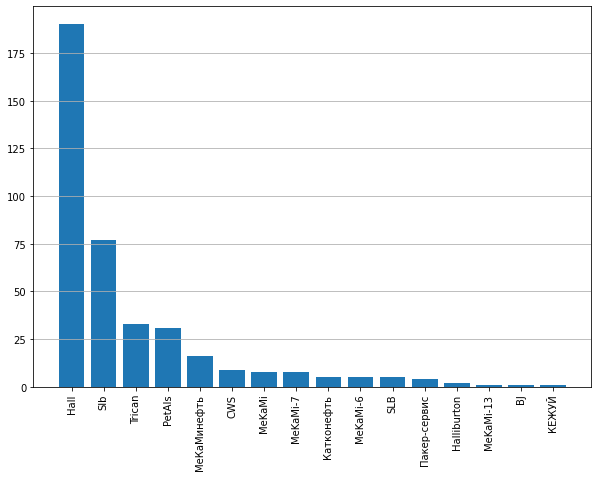

In [296]:
plt.figure(figsize=(10,7))
vendor =  mer_frac_clean_byfrac['perform']
plt.bar(list(vendor.value_counts().index), list(vendor.value_counts()))
plt.grid(axis='y')
plt.xticks(rotation=90);

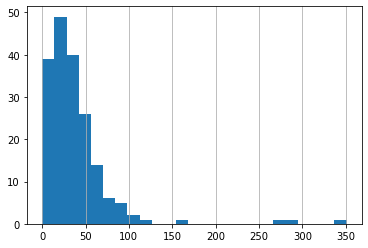

In [307]:
plt.hist(mer_frac_clean_byfrac[mer_frac_clean_byfrac['perform'] == 'Trican']['oil_t/day'], bins=25)
plt.grid(axis='x')

In [308]:
perform_mean = pd.DataFrame(mer_frac_clean_byfrac.groupby('perform')['oil_t/day'].median())
perform_mean.rename(columns = {'oil_t/day':'avg_oil_t/day'}, inplace=True)
perform_count = pd.DataFrame(mer_frac_clean_byfrac.groupby('perform')['oil_t/day'].count())
perform_count.rename(columns = {'oil_t/day':'count'}, inplace=True)
perform = perform_mean.join(perform_count)
perform.query('count > 25').sort_values(by='avg_oil_t/day', ascending=False)

,avg_oil_t/day,count
perform,,
Slb,45.735849,75
Наll,29.980569,186
Trican,24.370968,33
PetAls,19.379011,30
